In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [517]:
bikeShare=pd.read_csv('day.csv')

bikeShare.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [518]:
# dropping columns
bikeShare.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)
bikeShare.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [519]:
# mapping labels for weather
bikeShare.weathersit=bikeShare.weathersit.map({1:'Clear',2:'Cloudy', 3: 'Snow', 4:'Rainy'})

In [520]:
# mapping labels for seasons
bikeShare.season=bikeShare.season.map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

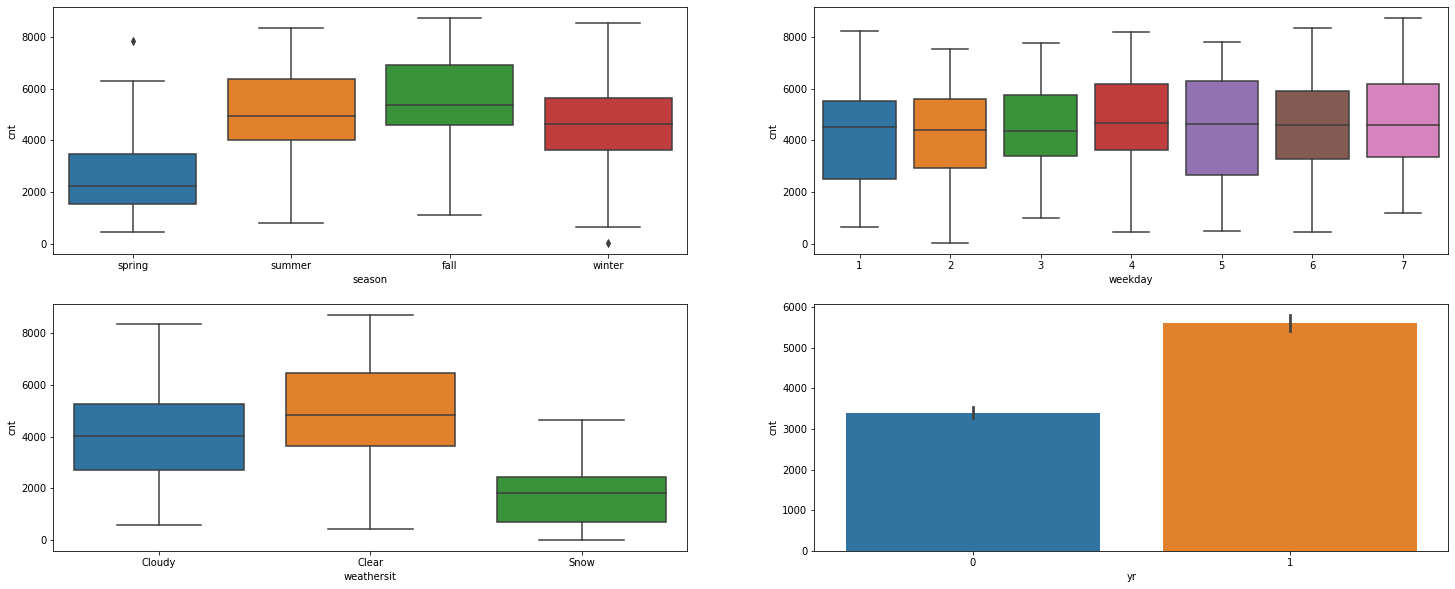

In [521]:
# relationship of some variables with count (demand of bike)
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(data=bikeShare, x='season', y='cnt')

plt.subplot(2,2,2)
sns.boxplot(data=bikeShare, x='weekday', y= 'cnt')

plt.subplot(2,2,3)
sns.boxplot(data=bikeShare, x='weathersit', y='cnt')

plt.subplot(2,2,4)
sns.barplot(data=bikeShare, x='yr', y='cnt')

plt.show()

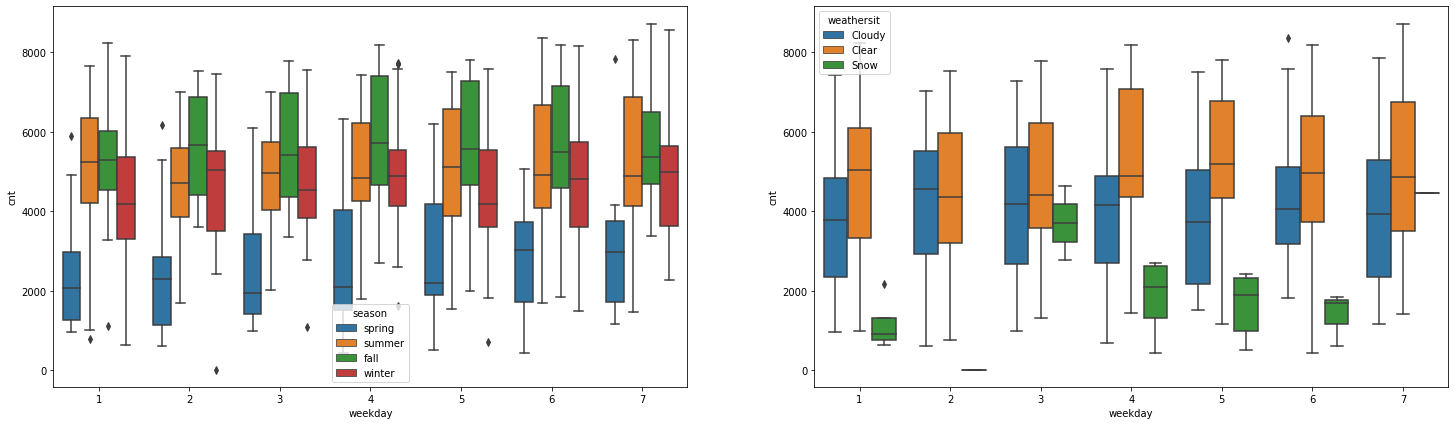

In [522]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.boxplot(data=bikeShare, x='weekday', y= 'cnt', hue='season')

plt.subplot(1,2,2)
sns.boxplot(data=bikeShare, x='weekday', y= 'cnt', hue='weathersit')
plt.show()

In [523]:
# dummy variables created for the season

dummy_attr=bikeShare[['season','weathersit']]
df_dummies=pd.get_dummies(dummy_attr, drop_first=True)
bikeShare=pd.concat([bikeShare,df_dummies],axis=1)

bikeShare.drop(['weathersit','season'], inplace=True, axis=1)


In [524]:
bikeShare.head(3)
# sns.pairplot(bikeShare)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Snow
0,0,1,0,1,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,2,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0


# Data split

In [525]:
bs_train, bs_test=train_test_split(bikeShare, train_size=0.7, test_size=0.3, random_state=100)

In [526]:
print(bs_train.shape)
print(bs_test.shape)

(510, 15)
(219, 15)


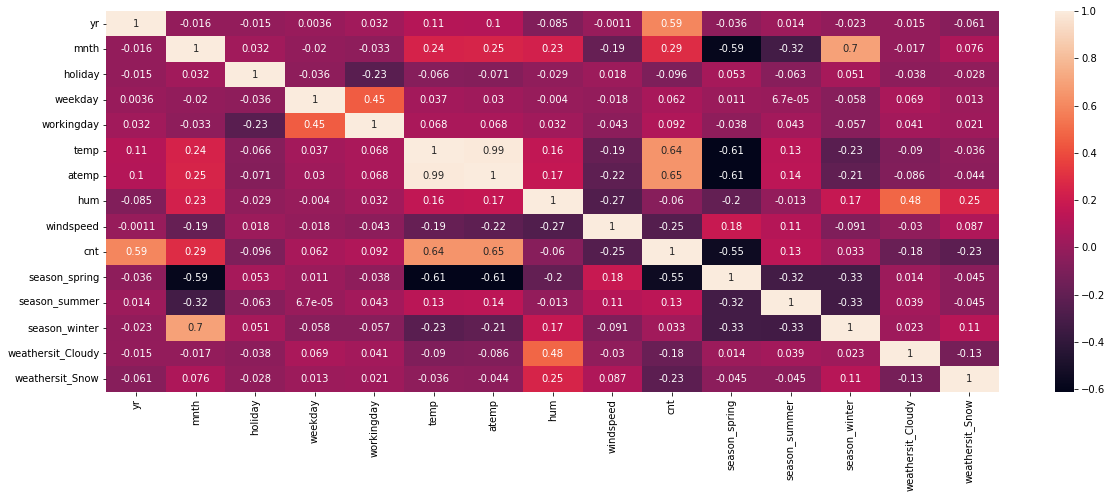

In [527]:
# heatmap to identify the correlation between various variables

plt.figure(figsize=(20,7))
sns.heatmap(data=bs_train.corr(), annot=True)
plt.show()

# Re Scaling Count attribute (min - max scaling)

# $ z= \frac {x- min(x)} {max(x)-min(x)}$

In [528]:
scaler = MinMaxScaler()
bs_train[['cnt']]=scaler.fit_transform(bs_train[['cnt']])

In [529]:
# splitting X_train and y_train
y_train=bs_train.pop('cnt')
X_train=bs_train

In [530]:
def createModel(xTrainData, yTrainData):
    X_train_lm = sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData, X_train_lm).fit()
    return lr

def getVIF(xTrainData, dataFrame):    
    dataFrame['Features']=xTrainData.columns
    dataFrame['VIF']=[variance_inflation_factor(xTrainData.values, i) for i in range(xTrainData.shape[1])]    
    return dataFrame

# MODEL -1

In [531]:
lr_1= createModel(X_train, y_train)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.15e-180
Time:                        22:52:40   Log-Likelihood:                 491.63
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     495   BIC:                            -889.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2319      0.04

## Create Dataframe for all features and their VIF calculated as 
# $ VIF_i = \frac 1 {1 - R_i^2} $


In [532]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
6,atemp,499.246902
5,temp,482.766933
7,hum,31.978478
1,mnth,15.634771
8,windspeed,7.208469
3,weekday,5.992969
11,season_winter,4.735464
9,season_spring,4.493847
4,workingday,4.124683
10,season_summer,2.763275


# MODEL -2
## Dropping variable atemp as it has high VIF and low significance

In [533]:
X_train.drop('atemp', axis=1, inplace=True)

lr_2= createModel(X_train, y_train)
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          8.73e-182
Time:                        22:52:41   Log-Likelihood:                 491.57
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     496   BIC:                            -895.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2335      0.04

In [534]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
6,hum,31.611436
5,temp,20.435538
1,mnth,15.602397
7,windspeed,7.018194
3,weekday,5.988994
10,season_winter,4.530236
8,season_spring,4.244416
4,workingday,4.122208
9,season_summer,2.582712
11,weathersit_Cloudy,2.339156


# Model- 3
## Dropping attribute workingday as it has low significance when compared to others

In [535]:
X_train.drop('workingday', axis=1, inplace=True)
lr_3= createModel(X_train, y_train)
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          7.05e-183
Time:                        22:52:41   Log-Likelihood:                 491.40
No. Observations:                 510   AIC:                            -956.8
Df Residuals:                     497   BIC:                            -901.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2354      0.04

In [536]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
5,hum,31.464971
4,temp,20.373921
1,mnth,15.600081
6,windspeed,7.018034
3,weekday,4.661263
9,season_winter,4.528055
7,season_spring,4.240515
8,season_summer,2.579021
10,weathersit_Cloudy,2.337848
0,yr,2.081247


# Model -4
## Dropping attribute 'mnth' as it has low significance when compared to others

In [537]:

X_train.drop('mnth', axis=1, inplace=True)
lr_4= createModel(X_train, y_train)
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.9
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          5.49e-184
Time:                        22:52:41   Log-Likelihood:                 491.22
No. Observations:                 510   AIC:                            -958.4
Df Residuals:                     498   BIC:                            -907.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2440      0.03

In [538]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
4,hum,28.608162
3,temp,18.536513
5,windspeed,6.778726
2,weekday,4.608300
6,season_spring,3.822414
8,season_winter,3.049516
9,weathersit_Cloudy,2.302076
7,season_summer,2.269959
0,yr,2.081028
10,weathersit_Snow,1.239698


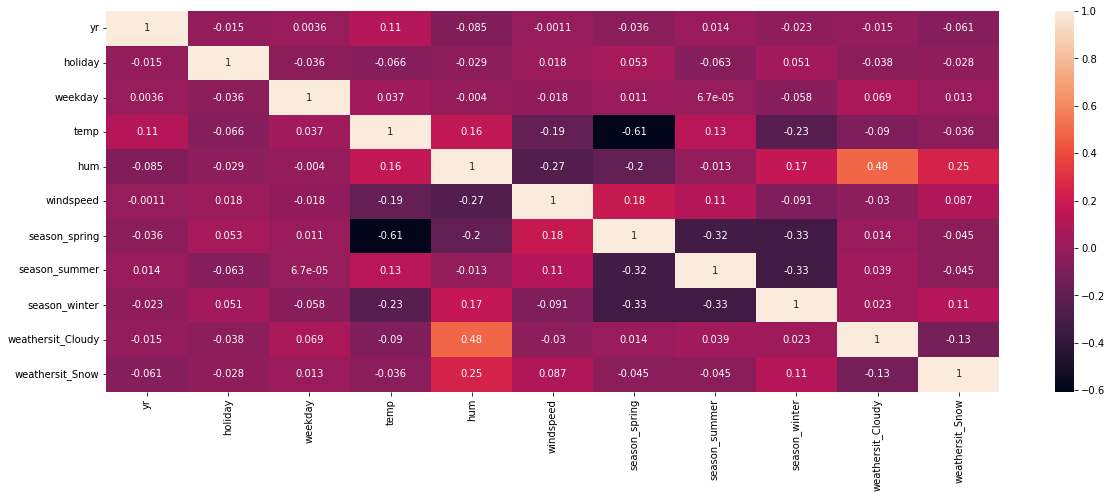

In [539]:
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Model -5
## Dropping attribute humidity due to high VIF

In [540]:
X_train.drop('hum', axis=1, inplace=True)
X_train_lm_5 = sm.add_constant(X_train)
lr_5=sm.OLS(y_train, X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          9.24e-183
Time:                        22:52:42   Log-Likelihood:                 485.48
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     499   BIC:                            -902.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1758      0.03

In [541]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
4,windspeed,6.712788
3,temp,6.129498
2,weekday,4.587036
5,season_spring,2.369230
0,yr,2.069140
6,season_summer,1.899600
7,season_winter,1.797582
8,weathersit_Cloudy,1.548616
9,weathersit_Snow,1.079889
1,holiday,1.038454


# Model- 6
## Dropping attribute windspeed due to high VIF

In [542]:
X_train.drop('windspeed', axis=1, inplace=True)
X_train_lm_6 = sm.add_constant(X_train)
lr_6=sm.OLS(y_train, X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.50e-176
Time:                        22:52:42   Log-Likelihood:                 467.97
No. Observations:                 510   AIC:                            -915.9
Df Residuals:                     500   BIC:                            -873.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1105      0.03

In [543]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
2,weekday,4.566829
3,temp,4.499710
0,yr,2.066769
5,season_summer,1.599879
4,season_spring,1.584191
7,weathersit_Cloudy,1.548337
6,season_winter,1.544876
8,weathersit_Snow,1.065319
1,holiday,1.037693


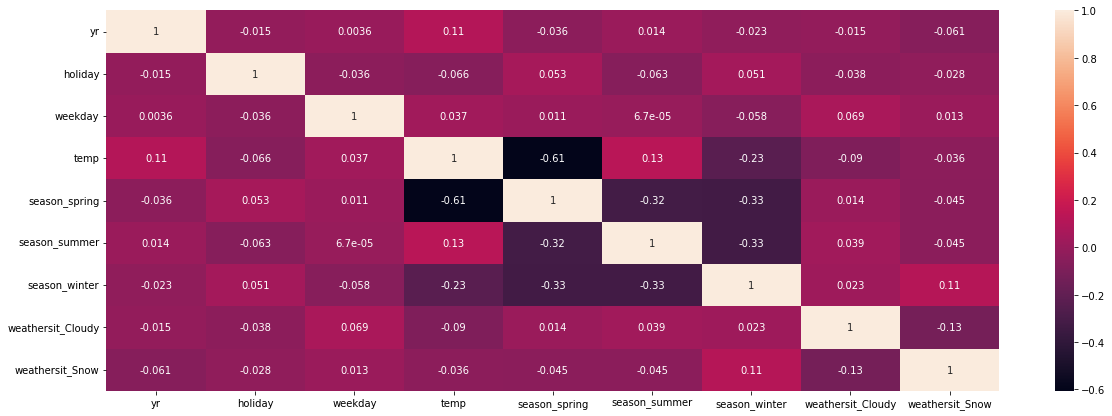

In [544]:
# checking correlation
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Model- 7
## Dropping attribute Season spring due to correlation value from heatmap above

In [545]:
X_train.drop('season_spring', axis=1, inplace=True)
X_train_lm_7 = sm.add_constant(X_train)
lr_7=sm.OLS(y_train, X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.24e-173
Time:                        22:52:42   Log-Likelihood:                 458.21
No. Observations:                 510   AIC:                            -898.4
Df Residuals:                     501   BIC:                            -860.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0131      0.01

In [546]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
3,temp,4.361148
2,weekday,3.755101
0,yr,1.988071
6,weathersit_Cloudy,1.506271
4,season_summer,1.454712
5,season_winter,1.375779
7,weathersit_Snow,1.063618
1,holiday,1.025819


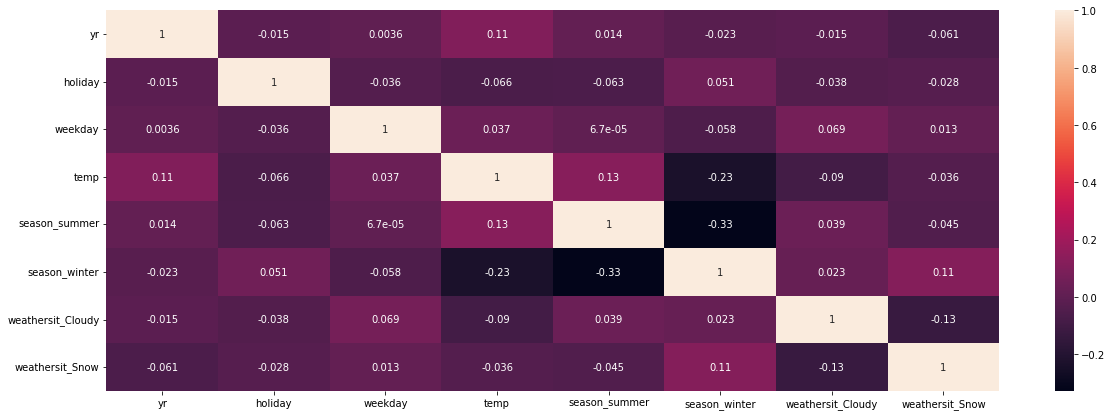

In [547]:
# checking correlation
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Residual analysis of train data

## Comparing Model 6 and 7

In [548]:
#predict
y_train_pred_6=lr_6.predict(X_train_lm_6)

y_train_pred_7=lr_7.predict(X_train_lm_7)


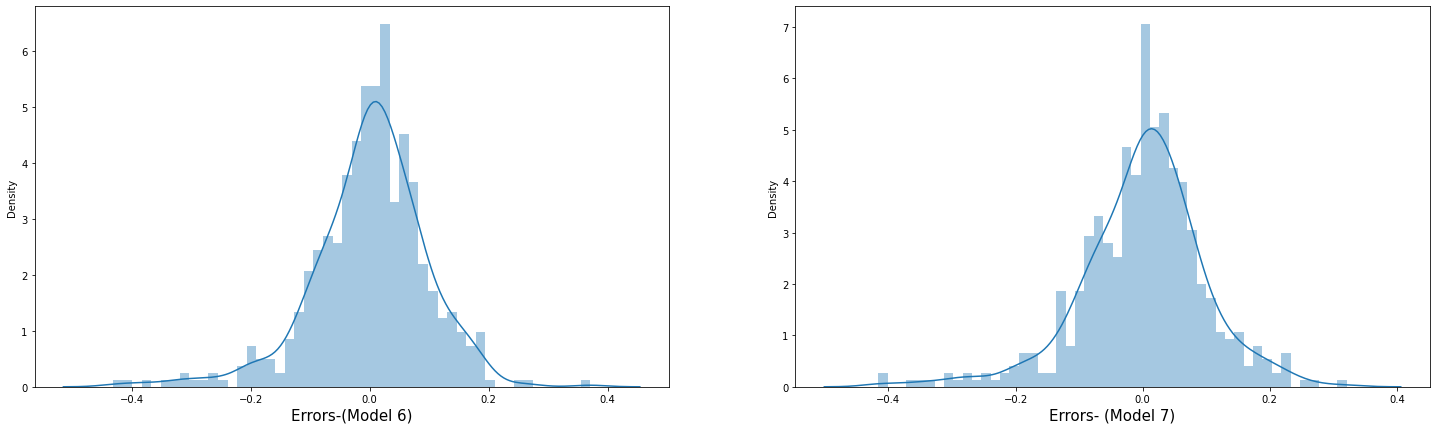

In [549]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.distplot((y_train-y_train_pred_6), bins=50)
plt.xlabel('Errors-(Model 6)', fontsize=15)

plt.subplot(1,2,2)
sns.distplot((y_train-y_train_pred_7), bins=50)
plt.xlabel('Errors- (Model 7)', fontsize=15)
plt.show()

### Conclusion- The adjusted R-Squared and R-Squared for Model 6 is better
### Dropping attribute season- spring does not add much value to the prediction outcome
### Also the distribution of error terms is normal in case of model 6 as compared to model 7 hence will take model 6 for final test on the data

# Prediction using final model

In [550]:
bs_test[['cnt']]=scaler.transform(bs_test[['cnt']])

In [551]:
columns_tobe_removed=['atemp','workingday','mnth','hum','windspeed']
bs_test.drop(columns_tobe_removed, axis=1, inplace=True)

bs_test.describe()

,yr,holiday,weekday,temp,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,4.187215,20.815737,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.188034,1.980784,7.689600,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,1.000000,3.957390,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,14.093750,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,20.807500,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,6.000000,27.401653,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,34.815847,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [552]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [553]:
# predict test data variable
X_test_lm=sm.add_constant(X_test)
y_pred=lr_6.predict(X_test_lm)

In [554]:
# evaluate performance
print("For the test data set {0} % variation in output variable is explained by the input variable".format(round(r2_score(y_true=y_test, y_pred=y_pred)*100),2))

For the test data set 81 % variation in output variable is explained by the input variable


Text(0, 0.5, 'Predicted')

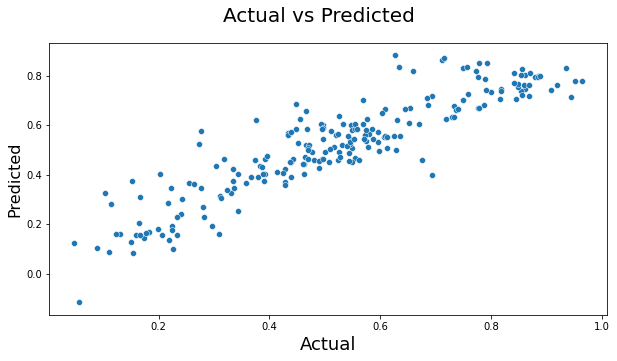

In [555]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test, y_pred)
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Actual', fontsize = 18)
plt.ylabel('Predicted', fontsize = 16)

In [556]:
# top attributes with coefficients inorder
df_attr = pd.DataFrame(lr_6.params)
df_attr.insert(0,'Variables',df_attr.index)
df_attr.rename(columns = {0:'Coefficients'},inplace = True)
df_attr['index'] = list(range(0,10))
df_attr.set_index('index',inplace = True)
df_attr.sort_values(by = 'Coefficients',ascending = False,inplace = True)
df_attr


,Variables,Coefficients
index,,
1,yr,0.232965
0,const,0.110532
7,season_winter,0.078088
6,season_summer,0.026503
4,temp,0.014464
3,weekday,0.007212
8,weathersit_Cloudy,-0.076689
2,holiday,-0.087513
5,season_spring,-0.093956


# Equation for best fitted line is 

### $ count = 0.233 * year + (-0.0875 * holiday) + 0.0072 * weekday + 0.0145 * temperature + (-0.0940 * spring) + 0.0265 * summer + 0.0781 * winter + (-0.0767 * cloudy) + (-0.2971 * snow) + 0.1105 $ 

# Suggestions
1. Year (Yr)- It is quite indicative that the sales have been hgher in the year 2019 hence the coefficient (0.2330) is the highest
2. Season - This is influencer in the sales number. So during summer and winter people tend use more bike. 
            Where there is a dip in demand durng cloud or snow days
3. Temperature- This is also a factor which influence the demand. With a unit increase in temperature the demand grows by 0.0145 units

<b>Its suggested to consider the non holdiday days during Summer and Winter </b> <br>
because the model shows the combined factor is an influencer in growth with almost 0.1 unit growth of demand 